In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [2]:
data = pd.read_csv('survey_results_public.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
data.columns.values

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [5]:
data.shape

(98855, 129)

In [6]:
df = pd.DataFrame (data, columns = ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary',
       'SalaryType', 'ConvertedSalary', 'CurrencySymbol',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons',
       'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear',
       'PlatformWorkedWith', 'PlatformDesireNextYear',
       'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE',
       'OperatingSystem', 'NumberMonitors', 'Methodology',
       'VersionControl', 'CheckInCode', 'AdBlocker', 'AdBlockerDisable',
       'AdBlockerReasons', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2',
       'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1',
       'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4',
       'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7',
       'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture',
       'EthicsChoice', 'EthicsReport', 'EthicsResponsible',
       'EthicalImplications', 'StackOverflowRecommend',
       'StackOverflowVisit', 'StackOverflowHasAccount',
       'StackOverflowParticipate', 'StackOverflowJobs',
       'StackOverflowDevStory', 'StackOverflowJobsRecommend',
       'StackOverflowConsiderMember', 'HypotheticalTools1',
       'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4',
       'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside',
       'SkipMeals', 'ErgonomicDevices', 'Exercise', 'Gender',
       'SexualOrientation', 'EducationParents', 'RaceEthnicity', 'Age',
       'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy'])

In [7]:
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

In [8]:
df.isna().sum()

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

In [9]:
df.drop(['Respondent','Country','AssessJob1', 'AssessJob2', 'AssessJob3', 'DevType', 'IDE',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10','AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobEmailPriorities7','Salary',
       'SalaryType', 'ConvertedSalary', 'CurrencySymbol',
       'CommunicationTools', 'TimeFullyProductive', 'SelfTaughtTypes', 'TimeAfterBootcamp','AdsPriorities1',
       'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4',
       'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7','MilitaryUS'], axis=1, inplace=True)

In [10]:
#df.head()

In [11]:
#value count of each category in Gender
df.Gender.value_counts()

Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Female;Non-binary, genderqueer, or gender non-conforming                        50
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Fema

In [12]:
# Get names of indexes for which column 'Gender' has values other than Male, Female and nan
indexNames = df[df.Gender.isin(['Non-binary, genderqueer', 'Transgender', 'Female;Male', 'Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming', 'Female;Transgender', 'Male;Non-binary, genderqueer, or gender non-conforming', 'Female;Non-binary, genderqueer, or gender non-conforming', 'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male;Transgender', 'Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female;Male;Transgender', 'Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female;Male;Non-binary, genderqueer, or gender non-conforming'])].index

# Delete these row indexes from the dataFrame
df.drop(indexNames , inplace=True)

In [13]:
#value count of each category in Gender
df.Gender.value_counts()

Male      59458
Female     4025
Name: Gender, dtype: int64

In [14]:
df.columns

Index(['Hobby', 'OpenSource', 'Student', 'Employment', 'FormalEducation',
       'UndergradMajor', 'CompanySize', 'YearsCoding', 'YearsCodingProf',
       'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'AssessBenefits1', 'UpdateCV',
       'Currency', 'EducationTypes', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'OperatingSystem', 'NumberMonitors',
       'Methodology', 'VersionControl', 'CheckInCode', 'AdBlocker',
       'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1',
       'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AIDangerous',
       'AIInteresting', 'AIResponsible', 'AIFuture', 'EthicsChoice',
       'EthicsReport', 'EthicsResponsible', 'EthicalImpl

In [15]:
df.shape

(97869, 77)

In [16]:
#replace missing values with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [17]:
#Check for missing values
#df.isna().sum()
df['CareerSatisfaction'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
98850    False
98851    False
98852    False
98853    False
98854    False
Name: CareerSatisfaction, Length: 97869, dtype: bool

In [18]:
df['CareerSatisfaction'].value_counts()

Moderately satisfied                  49922
Extremely satisfied                   14160
Slightly satisfied                    13330
Slightly dissatisfied                  6492
Neither satisfied nor dissatisfied     6216
Moderately dissatisfied                5185
Extremely dissatisfied                 2564
Name: CareerSatisfaction, dtype: int64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

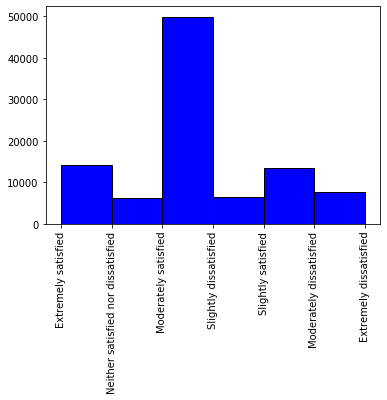

In [19]:
# matplotlib histogram
plt.hist(df['CareerSatisfaction'], color = 'blue', edgecolor = 'black', bins = int(30/5))
plt.xticks(rotation='vertical')

In [20]:
# aggregrate categories of Label
CareerSatisfactionLevel = {
    "Extremely satisfied":'Extremely satisfied',
    "Moderately satisfied":'Satisfied',
    'Slightly satisfied':'Satisfied',
    'Neither satisfied nor dissatisfied':'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied':'Dissatisfied',
    'Moderately dissatisfied':'Dissatisfied',
    'Extremely dissatisfied':'Extremely Dissatisfied'
}

df['CareerSatisfaction']=[CareerSatisfactionLevel[x] for x in df['CareerSatisfaction']]

In [21]:
df['CareerSatisfaction'].value_counts()

Satisfied                             63252
Extremely satisfied                   14160
Dissatisfied                          11677
Neither satisfied nor dissatisfied     6216
Extremely Dissatisfied                 2564
Name: CareerSatisfaction, dtype: int64

(array([14160.,  6216., 63252., 11677.,  2564.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

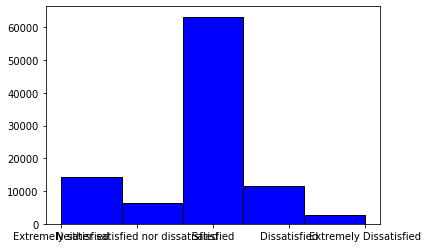

In [22]:
# matplotlib histogram
plt.hist(df['CareerSatisfaction'], color = 'blue', edgecolor = 'black', bins = int(25/5))

In [23]:
# aggregrate categories of Label
CareerSatisfactionLevel = {
    "Extremely satisfied":'Satisfied',
    'Satisfied':'Satisfied',
    'Neither satisfied nor dissatisfied':'Neither satisfied nor dissatisfied',
    'Dissatisfied':'Dissatisfied',
    'Extremely Dissatisfied':'Dissatisfied'
}

df['CareerSatisfaction']=[CareerSatisfactionLevel[x] for x in df['CareerSatisfaction']]

In [24]:
df['CareerSatisfaction'].value_counts()

Satisfied                             77412
Dissatisfied                          14241
Neither satisfied nor dissatisfied     6216
Name: CareerSatisfaction, dtype: int64

(array([77412.,     0.,  6216.,     0., 14241.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

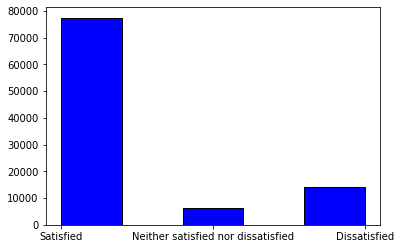

In [25]:
# matplotlib histogram
plt.hist(df['CareerSatisfaction'], color = 'blue', edgecolor = 'black', bins = int(25/5))

In [26]:
d = defaultdict(LabelEncoder)

# Encoding the variable
encoded_columns = df.apply(lambda x: d[x.name].fit_transform(x))
encoded_columns

,Hobby,OpenSource,Student,Employment,FormalEducation,UndergradMajor,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,...,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,SurveyTooLong,SurveyEasy
0,1,0,0,1,1,10,4,7,7,1,...,6,1,1,7,1,0,1,1,0,4
1,1,1,0,0,1,3,2,8,3,2,...,0,2,1,7,1,63,2,1,0,2
2,1,1,0,0,0,6,4,5,9,3,...,0,3,1,7,1,63,1,0,0,2
3,0,0,0,0,1,6,3,3,1,4,...,0,3,1,7,7,63,2,0,0,2
4,1,0,2,0,8,6,2,9,0,6,...,0,1,1,7,7,63,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,1,1,0,0,1,6,4,7,0,3,...,0,3,1,7,1,63,1,0,0,2
98851,0,1,1,4,1,6,4,0,0,3,...,0,3,1,7,1,63,1,0,0,2
98852,1,1,1,0,1,6,4,7,0,3,...,0,3,1,7,1,63,1,0,0,2
98853,1,0,0,2,8,6,4,7,0,3,...,0,3,1,7,1,63,1,0,0,2


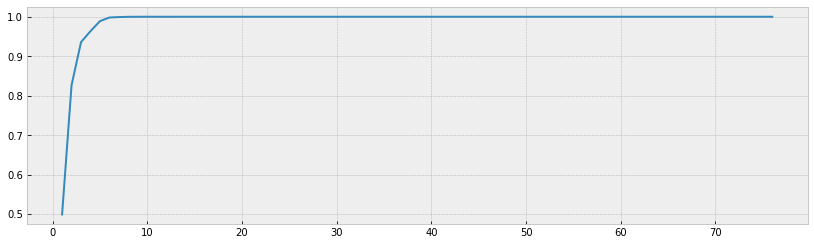

Number features: 3
Total Variance Explained: 0.9634486575454267
0.9355991296559927


In [27]:
# Importing the library
from sklearn.decomposition import PCA

X = encoded_columns.drop('CareerSatisfaction', axis=1)

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(X)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,X.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = X.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(X)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

In [28]:
X = encoded_columns.drop('CareerSatisfaction', axis=1)
y = encoded_columns['CareerSatisfaction']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
#pip install scikit-learn
y_train.value_counts()

2    61960
0    11354
1     4981
Name: CareerSatisfaction, dtype: int64

In [31]:
# check version number
import imblearn
print(imblearn.__version__)
import sklearn
sklearn.__version__

0.7.0


'0.23.2'

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

Before OverSampling, counts of label '1': 4922
Before OverSampling, counts of label '0': 11396 

Before OverSampling, counts of label '2': 61977 



In [33]:
sm = SMOTE(random_state= 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [34]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 61977, 1: 61977, 2: 61977}

In [35]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

After OverSampling, the shape of train_X: (185931, 76)
After OverSampling, the shape of train_y: (185931,) 

After OverSampling, counts of label '1': 61977
After OverSampling, counts of label '0': 61977
After OverSampling, counts of label '2': 61977


(array([11396.,     0.,  4922.,     0., 61977.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

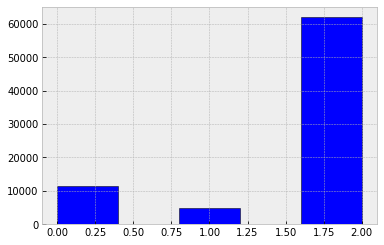

In [36]:
plt.hist(y_train, color = 'blue', edgecolor = 'black', bins = int(25/5))

(array([61977.,     0., 61977.,     0., 61977.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

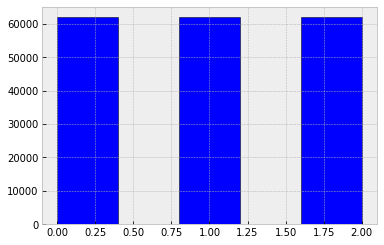

In [37]:
plt.hist(y_train_res, color = 'blue', edgecolor = 'black', bins = int(25/5))

<h3>Random Forest Model</h3>

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)

In [25]:
rfc.fit(X_train,y_train)
#rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

#print("Accuracy on training data : ",rfc.score(X_train_res,y_train_res))
print("Accuracy on training data : ",rfc.score(X_train,y_train))
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

Accuracy on training data :  0.9980969410562616


[[  40   82   44  269   21    8   34]
 [  13 1032   21 1708   20   10  103]
 [  32   94  121  581   25   43  106]
 [  18  760   70 8543   70   53  422]
 [   9   79   34  871   56   36  175]
 [  15   92   72  839   38   63  202]
 [  16  205   56 1930   52   63  328]]


              precision    recall  f1-score   support

           0       0.28      0.08      0.12       498
           1       0.44      0.36      0.39      2907
           2       0.29      0.12      0.17      1002
           3       0.58      0.86      0.69      9936
           4       0.20      0.04      0.07      1260
           5       0.23      0.05      0.08      1321
           6       0.24      0.12      0.16      2650

    accuracy                           0.52     19574
   macro avg       0.32      0.23      0.24     19574
weighted avg       0.44      0.52      0.45     19574



In [105]:
data1=pd.DataFrame({"feature":X_train.columns,"counts":rfc.feature_importances_},columns=["feature","counts"])

y [[0 1 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


y_score [[-0.30728874  0.27413479 -0.72927711]
 [-0.979193    0.518936   -1.09707912]
 [-0.91949238 -0.04556326 -1.07845377]
 ...
 [-1.08329161  0.64759646 -0.98887051]
 [-0.40111911  0.4021016  -0.75885173]
 [-1.36464426  0.40401713 -0.85374728]]


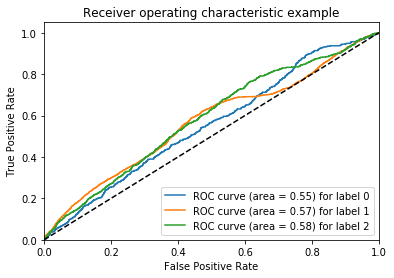

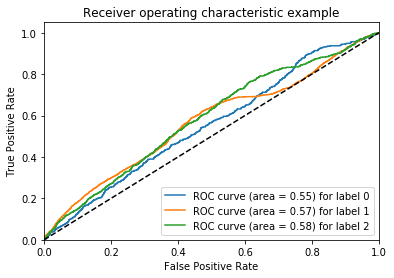

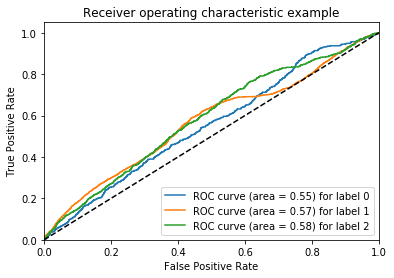

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

y = label_binarize(y, classes=[0,1,2])
n_classes = 3
print('y', y)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.2, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
print(y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)
print('y_score', y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    #plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

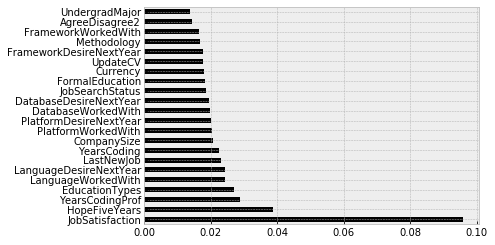

In [95]:
#importance features
(pd.Series(rfc.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='barh', color='black'))        # some method chaining, because it's sexy!

In [107]:
#Default parameters
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


<h5>Hyper parameter tuning for rfc</h5>

In [52]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state = 2)

param_grid = [{'n_estimators': [10, 25],
               'max_features': [5, 50, 75], 
               'max_depth': [5, 8, 10, 12, 15], 
               'bootstrap': [True, False]}]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
#print(grid_search_forest.best_params_)

In [53]:
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [5, 8, 10, 12, 15],
                          'max_features': [5, 50, 75],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [54]:
grid_pred = grid_search_forest.predict(X_test)
print(grid_search_forest.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 25}


In [55]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[ 1098     1  1792]
 [  148     3  1102]
 [  534     2 14894]]


              precision    recall  f1-score   support

           0       0.62      0.38      0.47      2891
           1       0.50      0.00      0.00      1253
           2       0.84      0.97      0.90     15430

    accuracy                           0.82     19574
   macro avg       0.65      0.45      0.46     19574
weighted avg       0.78      0.82      0.78     19574



<h3>SVM model</h3>

In [35]:
from sklearn.svm import SVC

In [32]:
#kernel = ['linear', 'rbf', 'poly', 'sigmoid']
#for i in kernel:
  #  model = SVC(kernel=i, C=1.0)
   # model.fit(X_train, y_train)
    #print("For kernel ", i)
    #print("Accuracy is ", (X_test, y_test))

In [36]:
model = SVC()

In [37]:
model.fit(X_train, y_train)

SVC()

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0    0    0  542    0    0    0]
 [   0    0    0 2876    0    0    0]
 [   0    0    0 1025    0    0    0]
 [   0    0    0 9946    0    0    0]
 [   0    0    0 1213    0    0    0]
 [   0    0    0 1286    0    0    0]
 [   0    0    0 2686    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       542
           1       0.00      0.00      0.00      2876
           2       0.00      0.00      0.00      1025
           3       0.51      1.00      0.67      9946
           4       0.00      0.00      0.00      1213
           5       0.00      0.00      0.00      1286
           6       0.00      0.00      0.00      2686

    accuracy                           0.51     19574
   macro avg       0.07      0.14      0.10     19574
weighted avg       0.26      0.51      0.34     19574



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y [[0 1 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


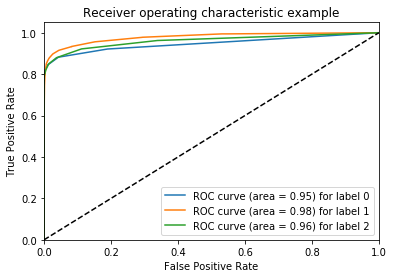

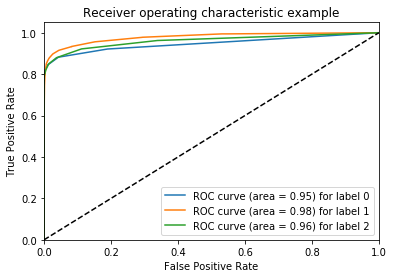

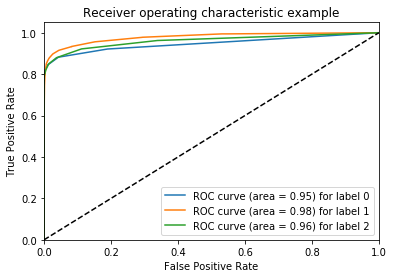

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.2, random_state=0)

#Calculate the y_score
y_score = rfc.predict_proba(X_test)

y = label_binarize(y, classes=[0,1,2])
n_classes = 3
print('y', y)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    #plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<h5>Hyper parameter tuting for SVM </h5>

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100], 
              'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 
              'gamma':[1,0.1,0.01], 
              'degree':[1,2,3,4,5]}

In [45]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] C=0.1, degree=1, gamma=1, kernel=linear .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, degree=1, gamma=1, kernel=linear, score=0.771, total=237.8min
[CV] C=0.1, degree=1, gamma=1, kernel=linear .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 237.8min remaining:    0.0s


In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

In [ ]:
grid_predict = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predict))
print(confusion_matrix(y_test,grid_predict))

<h3>Neural Network</h3>

In [30]:
#importing the Keras libraries and packages
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

Using TensorFlow backend.


In [31]:
#initializing the ANN:
classifier = Sequential()

In [32]:
from tensorflow.python.framework import tensor_util
def is_tensor(x):                                                                                                                                                      
    return tensor_util.is_tensor(x)

#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu', input_dim = 76))

In [33]:
# Adding the second hidden layer
classifier.add(Dense(units = 80, 
                     kernel_initializer = 'uniform', 
                     activation = 'relu'))

In [34]:
# Adding the third hidden layer
classifier.add(Dense(units = 90, 
                     kernel_initializer = 'uniform', 
                     activation = 'relu'))

In [35]:
# Adding the output layer
classifier.add(Dense(units = 7, 
                     kernel_initializer = 'uniform', 
                     activation = 'softmax'))

In [36]:
# Compiling the ANN
classifier.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

In [37]:
#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)
lr_model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
7830/7830 [==============================] - 15s 2ms/step - loss: 0.6585 - accuracy: 0.7907
Epoch 2/100
7830/7830 [==============================] - 13s 2ms/step - loss: 0.6403 - accuracy: 0.7914
Epoch 3/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6381 - accuracy: 0.7914
Epoch 4/100
7830/7830 [==============================] - 12s 2ms/step - loss: 0.6370 - accuracy: 0.7914
Epoch 5/100
7830/7830 [==============================] - 12s 1ms/step - loss: 0.6373 - accuracy: 0.7914
Epoch 6/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6369 - accuracy: 0.7914
Epoch 7/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6372 - accuracy: 0.7914
Epoch 8/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6411 - accuracy: 0.7914
Epoch 9/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6402 - accuracy: 0.7914
Epoch 10/100
7830/7830 [==============================] - 11s 1m

7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 80/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 81/100
7830/7830 [==============================] - 12s 2ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 82/100
7830/7830 [==============================] - 13s 2ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 83/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 84/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 85/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 86/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 87/100
7830/7830 [==============================] - 10s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 88/100
7830/7830 [==============================] - 11s 1ms/st

7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 58/100
7830/7830 [==============================] - 10s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 59/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6401 - accuracy: 0.7914
Epoch 60/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 61/100
7830/7830 [==============================] - 10s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 62/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 63/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 64/100
7830/7830 [==============================] - 10s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 65/100
7830/7830 [==============================] - 11s 1ms/step - loss: 0.6400 - accuracy: 0.7914
Epoch 66/100
7830/7830 [==============================] - 11s 1ms/st

In [38]:
predictions = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, np.argmax(predictions, axis = 1)))
print(classification_report (y_test, np.argmax(predictions, axis = 1)))

[[    0     0  2847]
 [    0     0  1278]
 [    0     0 15449]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2847
           1       0.00      0.00      0.00      1278
           2       0.79      1.00      0.88     15449

    accuracy                           0.79     19574
   macro avg       0.26      0.33      0.29     19574
weighted avg       0.62      0.79      0.70     19574



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]
 [1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]
 [1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]
 ...
 [1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]
 [1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]
 [1.4979774e-01 6.2593326e-02 7.8760886e-01 ... 9.4517269e-11
  9.4517096e-11 9.4517269e-11]]
y [[0 0 1]
 [0 1 0]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
frp [0. 1.]
frp [0. 1.]
frp [0. 1.]


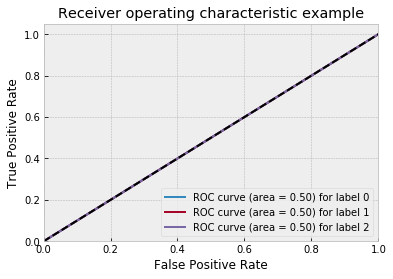

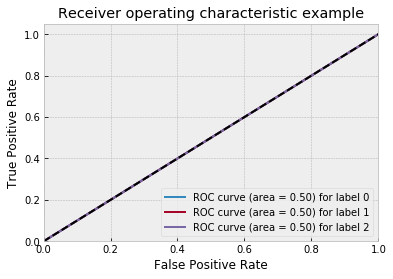

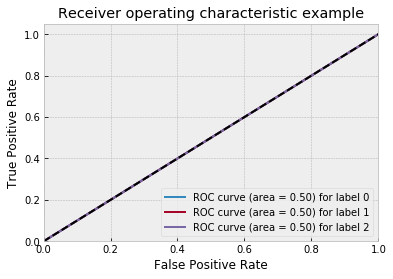

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.2, random_state=0)

#Calculate the y_score
y_score = classifier.predict_proba(X_test)
print(y_score)

y = label_binarize(y, classes=[0,1,2])
n_classes = 3
print('y', y)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    print('frp', fpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    #plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()